# Numeric - Polynomial Features Model

## Environment

In [3]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import seaborn as sns
sns.set(rc={"figure.figsize":(25, 15)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:.6g}'.format)

from scipy import stats
from scipy.stats import t

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import chi2

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

from sklearn.inspection import permutation_importance

from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import PolynomialFeatures

## Numeric - Reduced - Final Model

**Numeric Reduced Final MODEL:**
    
    - Dataset: DF reduced numeric
    - Train Test Split 80/20
    - NaN Imputer - Median
    - Polynomial Features
    - Linear Regression - sklearn
    - Métricas: MAE, RMSE, R2

### Dataset Reduced Numeric

In [4]:
df = pd.read_csv("data/airbnb-numeric.csv")

In [5]:
df.columns

Index(['Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Availability 30', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication',
       'Review Scores Location', 'Reviews per Month', 'Security Deposit',
       'Cleaning Fee', 'Calculated host listings count',
       'Num_Host_Verifications', 'Name_Len', 'Summary_Len', 'Space_Len',
       'Description_Len', 'Summary_Lang', 'is_Thumbnail', 'is_HostAbout',
       'is_ResponseInHours', 'is_EntireHome', 'is_Bed', 'is_UpdatedToday',
       'Price'],
      dtype='object')

In [6]:
selected_cols = ['Latitude', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Guests Included', 'Extra People', 
       'Availability 30', 'Cleaning Fee', 'Name_Len', 'Space_Len',
       'Description_Len', 'is_Thumbnail', 'is_HostAbout',
       'is_ResponseInHours', 'is_EntireHome', 
       'Price']

In [7]:
df = df[selected_cols]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13115 entries, 0 to 13114
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Latitude            13115 non-null  float64
 1   Accommodates        13115 non-null  int64  
 2   Bathrooms           13115 non-null  float64
 3   Bedrooms            13115 non-null  float64
 4   Beds                13115 non-null  float64
 5   Guests Included     13115 non-null  int64  
 6   Extra People        13115 non-null  int64  
 7   Availability 30     13115 non-null  int64  
 8   Cleaning Fee        13115 non-null  float64
 9   Name_Len            13115 non-null  int64  
 10  Space_Len           13115 non-null  int64  
 11  Description_Len     13115 non-null  int64  
 12  is_Thumbnail        13115 non-null  bool   
 13  is_HostAbout        13115 non-null  bool   
 14  is_ResponseInHours  13115 non-null  bool   
 15  is_EntireHome       13115 non-null  bool   
 16  Pric

In [9]:
df.shape

(13115, 17)

In [10]:
df.isnull().sum().sum()

0

Hay 13.115 filas, 27 columnas y 0 NaN

### Train Test Split

In [11]:
target = 'Price'
X = df.drop(target, axis=1)
y = df[target]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Polynomial Features

In [20]:
poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = False)

In [21]:
X_train_poly = poly.fit_transform(X_train)

In [22]:
polynomial_column_names = poly.get_feature_names_out(input_features = X_train.columns)

In [23]:
X_train_poly = pd.DataFrame(data = X_train_poly, columns = polynomial_column_names )
X_train_poly.columns = X_train_poly.columns.str.replace(' ', '_', regex=True)
X_train_poly.columns = X_train_poly.columns.str.replace('^', '_',regex=True)

In [24]:
X_test_poly = poly.transform(X_test)

In [25]:
X_test_poly = poly.transform(X_test)
X_test_poly = pd.DataFrame(data = X_test_poly, columns = polynomial_column_names )
X_test_poly.columns = X_test_poly.columns.str.replace(' ', '_', regex=True)
X_test_poly.columns = X_test_poly.columns.str.replace('^', '_',regex=True)

In [26]:
X_train = X_train_poly
X_test = X_test_poly

In [27]:
X_train.head()

,Latitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests_Included,Extra_People,Availability_30,Cleaning_Fee,Name_Len,Space_Len,Description_Len,is_Thumbnail,is_HostAbout,is_ResponseInHours,is_EntireHome,Latitude_2,Latitude_Accommodates,Latitude_Bathrooms,Latitude_Bedrooms,Latitude_Beds,Latitude_Guests_Included,Latitude_Extra_People,Latitude_Availability_30,Latitude_Cleaning_Fee,Latitude_Name_Len,Latitude_Space_Len,Latitude_Description_Len,Latitude_is_Thumbnail,Latitude_is_HostAbout,Latitude_is_ResponseInHours,Latitude_is_EntireHome,Accommodates_2,Accommodates_Bathrooms,Accommodates_Bedrooms,Accommodates_Beds,Accommodates_Guests_Included,Accommodates_Extra_People,Accommodates_Availability_30,Accommodates_Cleaning_Fee,Accommodates_Name_Len,Accommodates_Space_Len,Accommodates_Description_Len,Accommodates_is_Thumbnail,Accommodates_is_HostAbout,Accommodates_is_ResponseInHours,Accommodates_is_EntireHome,Bathrooms_2,Bathrooms_Bedrooms,Bathrooms_Beds,Bathrooms_Guests_Included,Bathrooms_Extra_People,Bathrooms_Availability_30,Bathrooms_Cleaning_Fee,Bathrooms_Name_Len,Bathrooms_Space_Len,Bathrooms_Description_Len,Bathrooms_is_Thumbnail,Bathrooms_is_HostAbout,Bathrooms_is_ResponseInHours,Bathrooms_is_EntireHome,Bedrooms_2,Bedrooms_Beds,Bedrooms_Guests_Included,Bedrooms_Extra_People,Bedrooms_Availability_30,Bedrooms_Cleaning_Fee,Bedrooms_Name_Len,Bedrooms_Space_Len,Bedrooms_Description_Len,Bedrooms_is_Thumbnail,Bedrooms_is_HostAbout,Bedrooms_is_ResponseInHours,Bedrooms_is_EntireHome,Beds_2,Beds_Guests_Included,Beds_Extra_People,Beds_Availability_30,Beds_Cleaning_Fee,Beds_Name_Len,Beds_Space_Len,Beds_Description_Len,Beds_is_Thumbnail,Beds_is_HostAbout,Beds_is_ResponseInHours,Beds_is_EntireHome,Guests_Included_2,Guests_Included_Extra_People,Guests_Included_Availability_30,Guests_Included_Cleaning_Fee,Guests_Included_Name_Len,Guests_Included_Space_Len,Guests_Included_Description_Len,Guests_Included_is_Thumbnail,Guests_Included_is_HostAbout,Guests_Included_is_ResponseInHours,Guests_Included_is_EntireHome,Extra_People_2,Extra_People_Availability_30,Extra_People_Cleaning_Fee,Extra_People_Name_Len,Extra_People_Space_Len,Extra_People_Description_Len,Extra_People_is_Thumbnail,Extra_People_is_HostAbout,Extra_People_is_ResponseInHours,Extra_People_is_EntireHome,Availability_30_2,Availability_30_Cleaning_Fee,Availability_30_Name_Len,Availability_30_Space_Len,Availability_30_Description_Len,Availability_30_is_Thumbnail,Availability_30_is_HostAbout,Availability_30_is_ResponseInHours,Availability_30_is_EntireHome,Cleaning_Fee_2,Cleaning_Fee_Name_Len,Cleaning_Fee_Space_Len,Cleaning_Fee_Description_Len,Cleaning_Fee_is_Thumbnail,Cleaning_Fee_is_HostAbout,Cleaning_Fee_is_ResponseInHours,Cleaning_Fee_is_EntireHome,Name_Len_2,Name_Len_Space_Len,Name_Len_Description_Len,Name_Len_is_Thumbnail,Name_Len_is_HostAbout,Name_Len_is_ResponseInHours,Name_Len_is_EntireHome,Space_Len_2,Space_Len_Description_Len,Space_Len_is_Thumbnail,Space_Len_is_HostAbout,Space_Len_is_ResponseInHours,Space_Len_is_EntireHome,Description_Len_2,Description_Len_is_Thumbnail,Description_Len_is_HostAbout,Description_Len_is_ResponseInHours,Description_Len_is_EntireHome,is_Thumbnail_2,is_Thumbnail_is_HostAbout,is_Thumbnail_is_ResponseInHours,is_Thumbnail_is_EntireHome,is_HostAbout_2,is_HostAbout_is_ResponseInHours,is_HostAbout_is_EntireHome,is_ResponseInHours_2,is_ResponseInHours_is_EntireHome,is_EntireHome_2
0,40.4138,3,1,1,1,2,15,4,35,35,464,999,0,1,1,1,1633.28,121.242,40.4138,40.4138,40.4138,80.8277,606.208,161.655,1414.48,1414.48,18752,40373.4,0,40.4138,40.4138,40.4138,9,3,3,3,6,45,12,105,105,1392,2997,0,3,3,3,1,1,1,2,15,4,35,35,464,999,0,1,1,1,1,1,2,15,4,35,35,464,999,0,1,1,1,1,2,15,4,35,35,464,999,0,1,1,1,4,30,8,70,70,928,1998,0,2,2,2,225,60,525,525,6960,14985,0,15,15,15,16,140,140,1856,3996,0,4,4,4,1225,1225,16240,34965,0,35,35,35,1225,16240,34965,0,35,35,35,215296,463536,0,464,464,464,998001,0,999,999,999,0,0,0,0,1,1,1,1,1,1
1,40.4331,3,1,1,1,1,0,2,18,31,50,222,1,0,1,1,1634.84,121.299,40.433

In [28]:
X_test.head()

,Latitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests_Included,Extra_People,Availability_30,Cleaning_Fee,Name_Len,Space_Len,Description_Len,is_Thumbnail,is_HostAbout,is_ResponseInHours,is_EntireHome,Latitude_2,Latitude_Accommodates,Latitude_Bathrooms,Latitude_Bedrooms,Latitude_Beds,Latitude_Guests_Included,Latitude_Extra_People,Latitude_Availability_30,Latitude_Cleaning_Fee,Latitude_Name_Len,Latitude_Space_Len,Latitude_Description_Len,Latitude_is_Thumbnail,Latitude_is_HostAbout,Latitude_is_ResponseInHours,Latitude_is_EntireHome,Accommodates_2,Accommodates_Bathrooms,Accommodates_Bedrooms,Accommodates_Beds,Accommodates_Guests_Included,Accommodates_Extra_People,Accommodates_Availability_30,Accommodates_Cleaning_Fee,Accommodates_Name_Len,Accommodates_Space_Len,Accommodates_Description_Len,Accommodates_is_Thumbnail,Accommodates_is_HostAbout,Accommodates_is_ResponseInHours,Accommodates_is_EntireHome,Bathrooms_2,Bathrooms_Bedrooms,Bathrooms_Beds,Bathrooms_Guests_Included,Bathrooms_Extra_People,Bathrooms_Availability_30,Bathrooms_Cleaning_Fee,Bathrooms_Name_Len,Bathrooms_Space_Len,Bathrooms_Description_Len,Bathrooms_is_Thumbnail,Bathrooms_is_HostAbout,Bathrooms_is_ResponseInHours,Bathrooms_is_EntireHome,Bedrooms_2,Bedrooms_Beds,Bedrooms_Guests_Included,Bedrooms_Extra_People,Bedrooms_Availability_30,Bedrooms_Cleaning_Fee,Bedrooms_Name_Len,Bedrooms_Space_Len,Bedrooms_Description_Len,Bedrooms_is_Thumbnail,Bedrooms_is_HostAbout,Bedrooms_is_ResponseInHours,Bedrooms_is_EntireHome,Beds_2,Beds_Guests_Included,Beds_Extra_People,Beds_Availability_30,Beds_Cleaning_Fee,Beds_Name_Len,Beds_Space_Len,Beds_Description_Len,Beds_is_Thumbnail,Beds_is_HostAbout,Beds_is_ResponseInHours,Beds_is_EntireHome,Guests_Included_2,Guests_Included_Extra_People,Guests_Included_Availability_30,Guests_Included_Cleaning_Fee,Guests_Included_Name_Len,Guests_Included_Space_Len,Guests_Included_Description_Len,Guests_Included_is_Thumbnail,Guests_Included_is_HostAbout,Guests_Included_is_ResponseInHours,Guests_Included_is_EntireHome,Extra_People_2,Extra_People_Availability_30,Extra_People_Cleaning_Fee,Extra_People_Name_Len,Extra_People_Space_Len,Extra_People_Description_Len,Extra_People_is_Thumbnail,Extra_People_is_HostAbout,Extra_People_is_ResponseInHours,Extra_People_is_EntireHome,Availability_30_2,Availability_30_Cleaning_Fee,Availability_30_Name_Len,Availability_30_Space_Len,Availability_30_Description_Len,Availability_30_is_Thumbnail,Availability_30_is_HostAbout,Availability_30_is_ResponseInHours,Availability_30_is_EntireHome,Cleaning_Fee_2,Cleaning_Fee_Name_Len,Cleaning_Fee_Space_Len,Cleaning_Fee_Description_Len,Cleaning_Fee_is_Thumbnail,Cleaning_Fee_is_HostAbout,Cleaning_Fee_is_ResponseInHours,Cleaning_Fee_is_EntireHome,Name_Len_2,Name_Len_Space_Len,Name_Len_Description_Len,Name_Len_is_Thumbnail,Name_Len_is_HostAbout,Name_Len_is_ResponseInHours,Name_Len_is_EntireHome,Space_Len_2,Space_Len_Description_Len,Space_Len_is_Thumbnail,Space_Len_is_HostAbout,Space_Len_is_ResponseInHours,Space_Len_is_EntireHome,Description_Len_2,Description_Len_is_Thumbnail,Description_Len_is_HostAbout,Description_Len_is_ResponseInHours,Description_Len_is_EntireHome,is_Thumbnail_2,is_Thumbnail_is_HostAbout,is_Thumbnail_is_ResponseInHours,is_Thumbnail_is_EntireHome,is_HostAbout_2,is_HostAbout_is_ResponseInHours,is_HostAbout_is_EntireHome,is_ResponseInHours_2,is_ResponseInHours_is_EntireHome,is_EntireHome_2
0,40.4094,2,1,1,1,1,15,16,0,40,461,1000,1,1,0,0,1632.92,80.8189,40.4094,40.4094,40.4094,40.4094,606.142,646.551,0,1616.38,18628.8,40409.4,40.4094,40.4094,0,0,4,2,2,2,2,30,32,0,80,922,2000,2,2,0,0,1,1,1,1,15,16,0,40,461,1000,1,1,0,0,1,1,1,15,16,0,40,461,1000,1,1,0,0,1,1,15,16,0,40,461,1000,1,1,0,0,1,15,16,0,40,461,1000,1,1,0,0,225,240,0,600,6915,15000,15,15,0,0,256,0,640,7376,16000,16,16,0,0,0,0,0,0,0,0,0,0,1600,18440,40000,40,40,0,0,212521,461000,461,461,0,0,1e+06,1000,1000,0,0,1,1,0,0,1,0,0,0,0,0
1,40.4553,4,1,1,2,1,0,10,45,38,0,670,1,0,1,1,1636.63,161.821,40.4553,40.4553,80.9107,40.4553,0,404

### Sklearn Linear Regression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression()

In [31]:
X_pred = model.predict(X_train)

In [32]:
y_pred = model.predict(X_test)

### Results

In [33]:
train = ['Train Num FE Rev',
            round(mean_absolute_error(y_train, X_pred),2),
            round(mean_squared_error(y_train, X_pred, squared=False),2),
            round(r2_score(y_train, X_pred),3)]

test = ['Test Num FE Rev',
           round(mean_absolute_error(y_test, y_pred),2),
           round(mean_squared_error(y_test, y_pred, squared=False),2),
           round(r2_score(y_test, y_pred),3)]

results = pd.DataFrame([train, test])
results.columns=['Model','MAE', 'RMSE','R2']

In [34]:
results

,Model,MAE,RMSE,R2
0,Train Num FE Rev,19.13,33.93,0.642
1,Test Num FE Rev,18.97,31.72,0.645


### Cross Validation

In [55]:
mae_scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_absolute_error')
print("MEAN CV MAE: %.3f" %round(abs(mae_scores.mean()),2))

MEAN CV MAE: 21.670


In [56]:
rmse_scores = cross_val_score(model, X, y, cv=10, scoring='neg_root_mean_squared_error')
print("MEAN CV RMSE: %.3f" %round(abs(rmse_scores.mean()),2))

MEAN CV RMSE: 38.730


In [57]:
r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print("MEAN CV MAE: %.3f" %round(abs(r2_scores.mean()),2))

MEAN CV MAE: 0.520


### Residuals

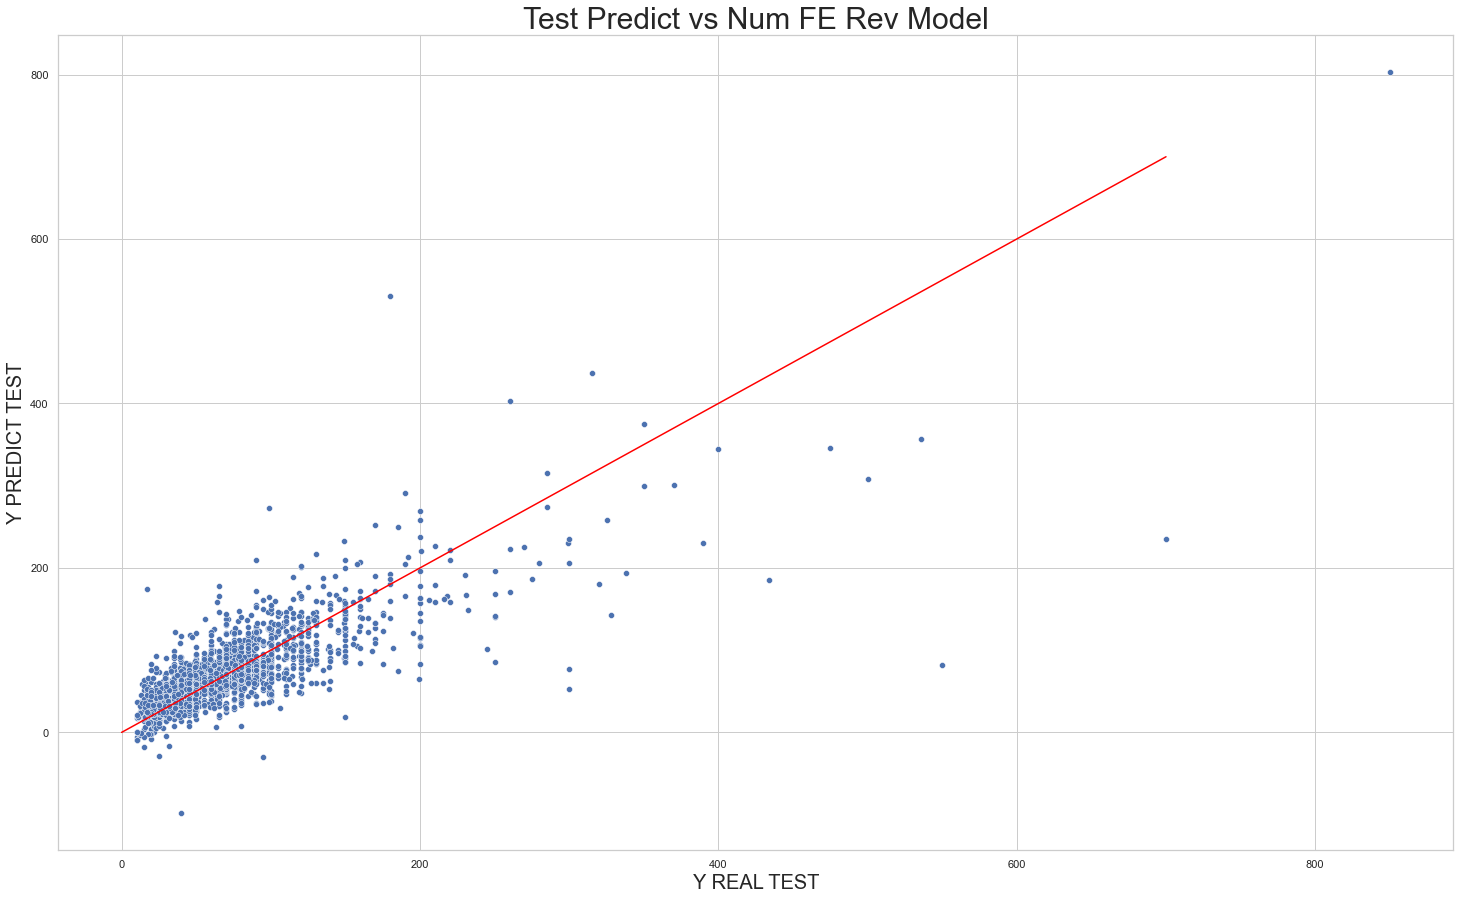

In [41]:
sns.scatterplot(y=y_pred, x=y_test)
sns.lineplot(x=[0,700], y=[0,700], color='red')
plt.title("Test Predict vs Num FE Rev Model", size=30)
plt.xlabel('Y REAL TEST', size=20)
plt.ylabel('Y PREDICT TEST', size=20)
plt.show()

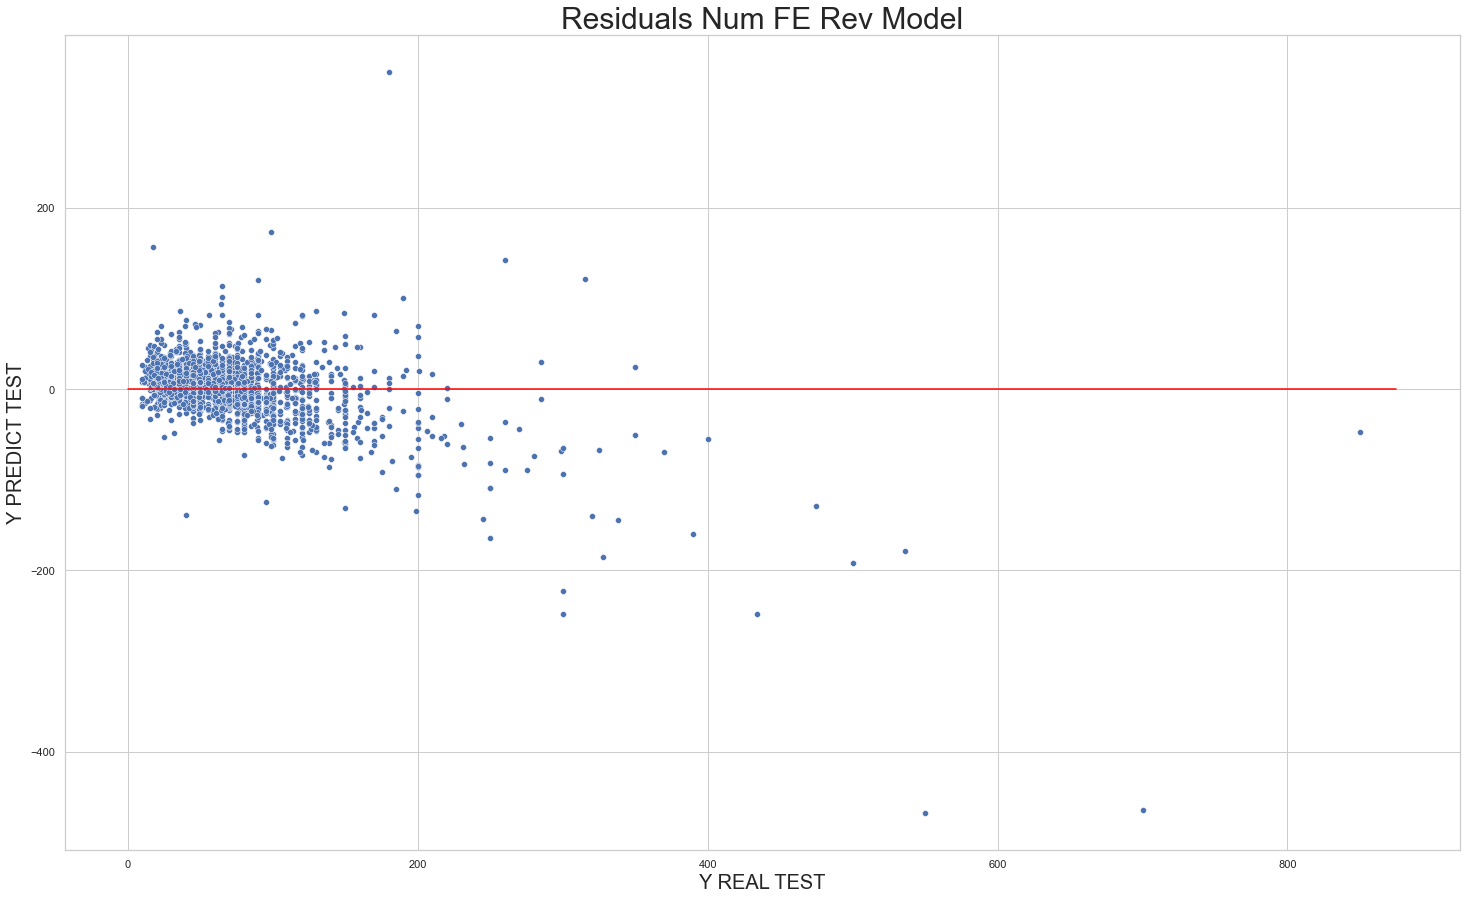

In [42]:
diff = y_pred - y_test
sns.scatterplot(y=diff, x=y_test)
sns.lineplot(x=[0,875], y=[0,0], color='red')
plt.title("Residuals Num FE Rev Model", size=30)
plt.xlabel('Y REAL TEST', size=20)
plt.ylabel('Y PREDICT TEST', size=20)
plt.show()

HAy más dificultad en predecir los precios altos

### Permutarion Importance

In [50]:
perm_importance = permutation_importance(model, X_train, y_train, n_repeats=5,random_state=42)

In [51]:
sorted_idx = perm_importance.importances_mean.argsort()

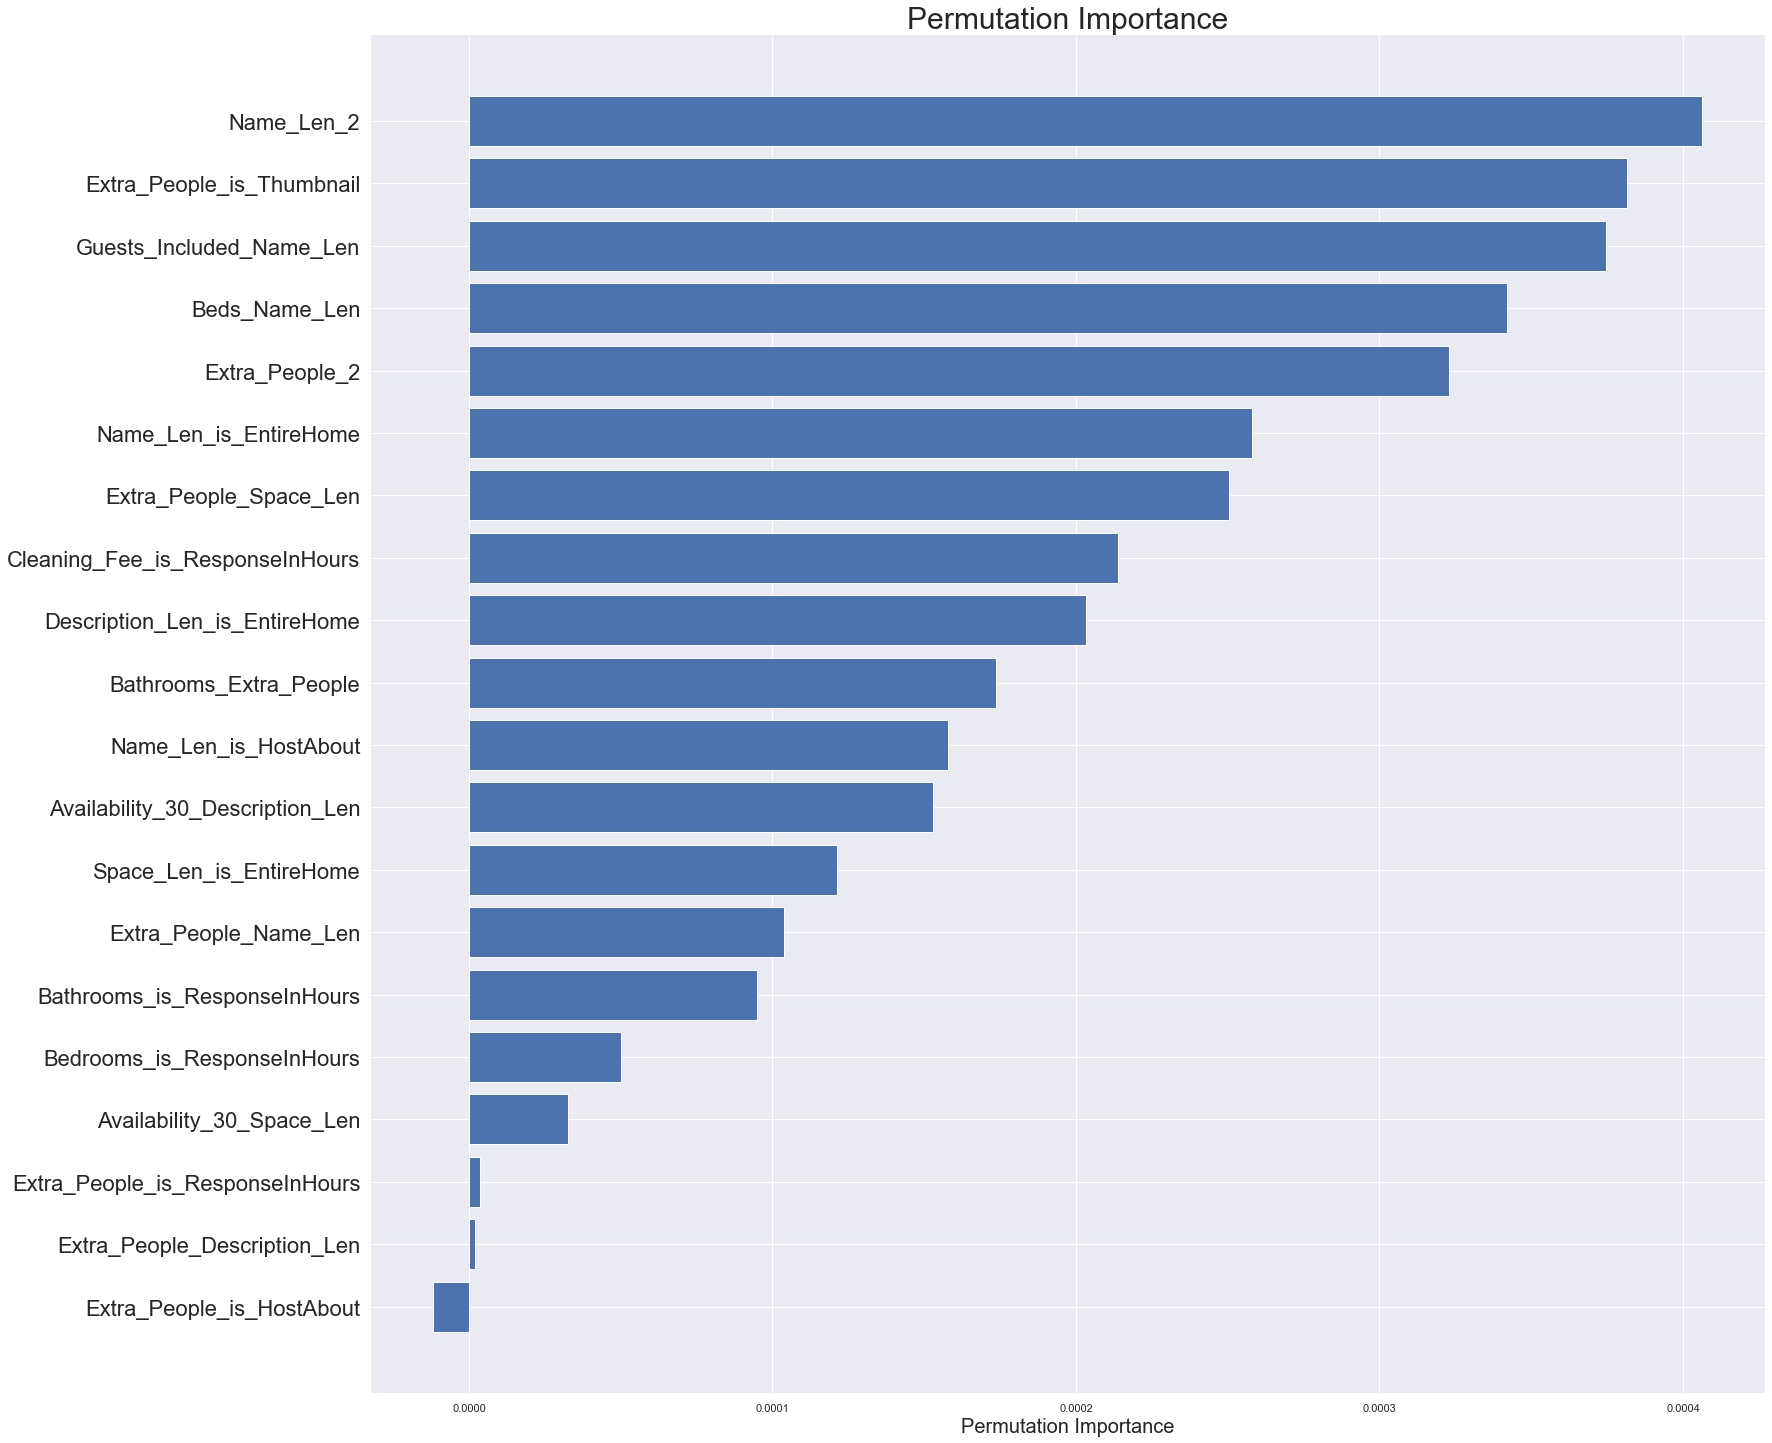

In [54]:
sns.set(rc={"figure.figsize":(25, 25)})
plt.barh(X_train.columns[sorted_idx][0:20], perm_importance.importances_mean[sorted_idx][0:20])
plt.xlabel("Permutation Importance", size=20)
plt.title('Permutation Importance', size= 30)
plt.yticks(size=22)
plt.show()